# Clase 3 - Reconocimiento de Patrones en Imagenes

## Momento
El momento espacial de una imagen es una medida que describe la distribución de los píxeles activos (valor 1) en la imagen. Se calcula para diferentes órdenes \((r, s)\), donde \(r\) y \(s\) representan las potencias a las que se elevan las coordenadas \(i\) y \(j\) de los píxeles activos. Este cálculo es útil para analizar propiedades geométricas de la imagen, como su área, centroide y orientación.

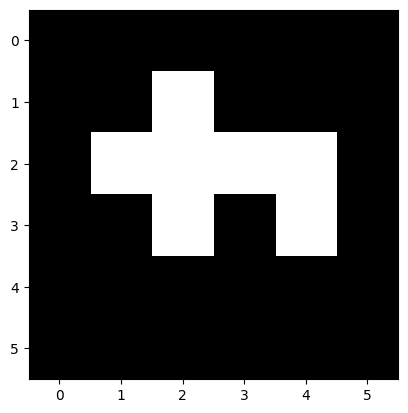

In [2]:
import numpy as np
import matplotlib.pyplot as plt

m = [[0, 0, 0, 0, 0, 0],
     [0, 0, 1, 0, 0, 0],
     [0, 1, 1, 1, 1, 0],
     [0, 0, 1, 0, 1, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]]

m = np.array(m) 

def Momento (r, s, img):
    R = np.argwhere(img==1)
    #print(R)
    i = R[:,0]
    #print(i)
    j = R[:,1]
    #print(j)

    return np.sum((i**r) * (j**s))


plt.figure()
plt.imshow(m, cmap='gray')
plt.show()


## Centro de Masa
El centro de masa de una imagen es el punto promedio de distribución de los píxeles activos (valor 1). Se calcula utilizando los momentos espaciales de primer orden \(M_{10}\) y \(M_{01}\), divididos por el momento de orden cero \(M_{00}\), que representa el área total de los píxeles activos. Este punto es útil para identificar la posición central de una forma en la imagen.

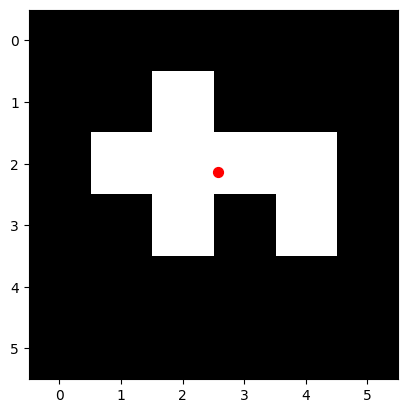

In [3]:

centro = [Momento(1,0,m)/ Momento(0,0,m) , Momento(0,1,m)/ Momento(0,0,m)]

plt.figure()
plt.imshow(m, cmap='gray')
plt.scatter(centro[1], centro[0], c='red', s=50)
plt.show()

## Momento Central
El momento centralizado se calcula tomando como referencia el centro de masa de la imagen. Esto permite obtener una medida que es independiente de la posición de la forma en la imagen. Los momentos centralizados son útiles para describir características geométricas de la forma, como su simetría y orientación, de manera más robusta.

In [6]:
def Momento_central(r, s, img):
    
    R = np.argwhere(img==1)
    i = R[:,0]
    j = R[:,1]
    i0 = Momento(1,0,img)/ Momento(0,0,img)
    j0 = Momento(0,1,img)/ Momento(0,0,img)

    return np.sum((i - i0)**r * (j - j0)**s)

print(Momento_central(0,0,m))



7.0


## Momento de Hu
Los momentos invariantes de Hu son un conjunto de características calculadas a partir de los momentos centralizados de una imagen. Estas características son invariantes a transformaciones como traslación, escala y rotación, lo que las hace útiles para el reconocimiento de patrones y análisis de formas. En este caso, se implementa una fórmula para calcular estos momentos y describir propiedades invariantes de la imagen.

In [5]:
def Momento_Hu (r, s, img):
    t= (r+s)/2 + 1
    return Momento_central(r,s,img) / Momento_central(0,0,img)**t

print(Momento_Hu(2,0,m) + Momento_Hu(0,2,m))


0.21574344023323616
